In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix

from sklearn.ensemble import RandomForestRegressor,VotingRegressor


In [171]:
data = pd.read_csv(r'C:\Users\yasha\Desktop\Model\insurance.csv')
df = pd.DataFrame(data)

In [172]:
#Dropping region assuming a regional policy
#let say currently we are focusing on one city only 
df.drop('region',axis=1,inplace=True)
df


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [173]:
df.nunique()


age           47
sex            2
bmi          548
children       6
smoker         2
charges     1337
dtype: int64

In [174]:
#checking that are they any defaulty values like age=0, etc
df.isnull().sum()
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')


In [175]:
#converting categorical values to numerical values
cols = df.columns   

for col in cols :
           if df[col].dtype =='object':
            df[col] =  LabelEncoder().fit_transform(df[col])
            
print(df)            
# 0 = female and 1 is fro male in sex
# smoker: 1 =yes, 

      age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770         1       0   1725.55230
2      28    1  33.000         3       0   4449.46200
3      33    1  22.705         0       0  21984.47061
4      32    1  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970         3       0  10600.54830
1334   18    0  31.920         0       0   2205.98080
1335   18    0  36.850         0       0   1629.83350
1336   21    0  25.800         0       0   2007.94500
1337   61    0  29.070         0       1  29141.36030

[1338 rows x 6 columns]


In [176]:

for column in cols:
    sek = df[column].skew()
    if(sek < 0) :
        sek = -sek 
    print(sek)
    if sek == 0:
        print ('Normal')
    elif -0.5 <= sek <= 0.5:
        print(column + ' Approximately Symmetric')
    elif sek >= 1 or sek <= 1:
        print(column + ' Skewed')
        
# smoker and children columns are skewed 

0.05567251565299186
age Approximately Symmetric
0.02095139743334541
sex Approximately Symmetric
0.2840471105987448
bmi Approximately Symmetric
0.9383804401702414
children Skewed
1.4647661601953743
smoker Skewed
1.5158796580240388
charges Skewed


In [177]:
correlation_matrix = df.corr()
print(correlation_matrix)

# correlation_matrix['charges']

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


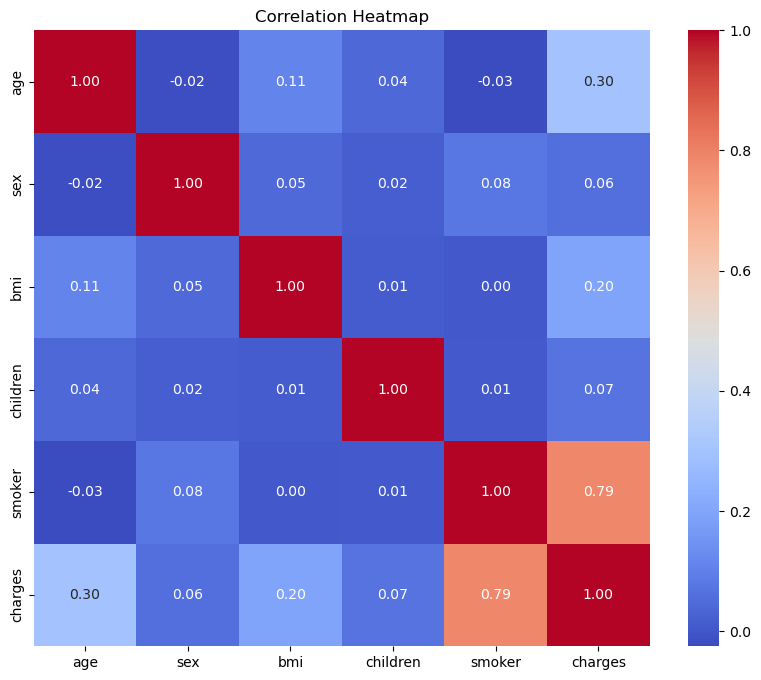

In [178]:
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()
#smoker is highly correlated with Insurance chargers

In [179]:
# Feature Scaling
print(df)
x_scale = df.drop(['sex','children','smoker'],axis =1)
x_scale

      age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770         1       0   1725.55230
2      28    1  33.000         3       0   4449.46200
3      33    1  22.705         0       0  21984.47061
4      32    1  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970         3       0  10600.54830
1334   18    0  31.920         0       0   2205.98080
1335   18    0  36.850         0       0   1629.83350
1336   21    0  25.800         0       0   2007.94500
1337   61    0  29.070         0       1  29141.36030

[1338 rows x 6 columns]


,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [180]:
scaler = MinMaxScaler()
df_scaled = df.copy()

print(df_scaled)

x_scale = x_scale.columns
df_scaled[x_scale] = scaler.fit_transform(df_scaled[x_scale])

df_scaled

      age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770         1       0   1725.55230
2      28    1  33.000         3       0   4449.46200
3      33    1  22.705         0       0  21984.47061
4      32    1  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970         3       0  10600.54830
1334   18    0  31.920         0       0   2205.98080
1335   18    0  36.850         0       0   1629.83350
1336   21    0  25.800         0       0   2007.94500
1337   61    0  29.070         0       1  29141.36030

[1338 rows x 6 columns]


,age,sex,bmi,children,smoker,charges
0,0.021739,0,0.321227,0,1,0.251611
1,0.000000,1,0.479150,1,0,0.009636
2,0.217391,1,0.458434,3,0,0.053115
3,0.326087,1,0.181464,0,0,0.333010
4,0.304348,1,0.347592,0,0,0.043816
...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,0.151299
1334,0.000000,0,0.429379,0,0,0.017305
1335,0.000000,0,0.562012,0,0,0.008108
1336,0.065217,0,0.264730,0,0,0.014144


In [181]:
# Splitting into features and target
x = df_scaled.drop('charges',axis=1)
y = df_scaled['charges']

print(x,y)

           age  sex       bmi  children  smoker
0     0.021739    0  0.321227         0       1
1     0.000000    1  0.479150         1       0
2     0.217391    1  0.458434         3       0
3     0.326087    1  0.181464         0       0
4     0.304348    1  0.347592         0       0
...        ...  ...       ...       ...     ...
1333  0.695652    1  0.403820         3       0
1334  0.000000    0  0.429379         0       0
1335  0.000000    0  0.562012         0       0
1336  0.065217    0  0.264730         0       0
1337  0.934783    0  0.352704         0       1

[1338 rows x 5 columns] 0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1338, dtype: float64


In [182]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

linear_regression = LinearRegression()


In [183]:
# Fit the model on the training data
linear_regression.fit(x_train, y_train)

LinearRegression()

In [184]:
#predictions
y_pred = linear_regression.predict(x_test)

#Evalutions

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse,r2) 
# output is 0.00859476091661847   0.7777630966249415

0.00859476091661847 0.7777630966249415


In [185]:
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x,y,test_size=0.2,random_state=1)

random_forest = RandomForestRegressor(n_estimators=100, random_state=1)

In [186]:
random_forest.fit(x_train_2,y_train_2)

RandomForestRegressor(random_state=1)

In [187]:
# Prediction Random Forest
y_pred_2 = random_forest.predict(x_test)

#Evalutions
mse2 = mean_squared_error(y_pred_2,y_test_2)
r2_score_2 = r2_score(y_pred_2,y_test_2)

print(mse2,r2_score_2)

# output is 0.0059827192322147865 0.829802167555917

0.06543958496044307 -0.9663153297889462


In [188]:
#Ensembling Linear Regresion and Random Forest
ensemble_model = VotingRegressor([('linear_regression',linear_regression),('random_forest',random_forest)])

x_train_3,x_test_3,y_train_3,y_test_3 = train_test_split(x,y,test_size=0.2,random_state=1)

#Fitting ensemble model
ensemble_model.fit(x_train_3,y_train_3)

VotingRegressor(estimators=[('linear_regression', LinearRegression()),
                            ('random_forest',
                             RandomForestRegressor(random_state=1))])

In [189]:
# Predictions
y_pred_ensemble = ensemble_model.predict(x_test_3)

#Evalutions
mse3 = mean_squared_error(y_pred_ensemble,y_test_3)
r2_score3 = r2_score(y_test_3,y_pred_ensemble)

print(mse3, r2_score3)

#output is 0.0061219613145212974 0.839043248586442


0.0061219613145212974 0.839043248586442


In [191]:
# # final accuracy score

# cm = confusion_matrix(y_test_3,y_pred_ensemble)
# print(cm)

# acc = accuracy_score(y_test_3,y_pred_ensemble)
# acc

ValueError: continuous is not supported